In [4]:
import pandas as pd

df = pd.read_csv('Student Attitude and Behavior.csv')

In [18]:
df.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Certification Course                                    235 non-null    object 
 1   Gender                                                  235 non-null    object 
 2   Department                                              235 non-null    object 
 3   Height(CM)                                              235 non-null    float64
 4   Weight(KG)                                              235 non-null    float64
 5   10th Mark                                               235 non-null    float64
 6   12th Mark                                               235 non-null    float64
 7   college mark                                            235 non-null    float64
 8   hobbies                                 

In [ ]:
## Q: 학생이 공부를 선호하는 시간(prefer to study in)에 따른 대학 성적(college mark)이 차이가 있을까??

In [38]:
df['prefer to study in'].unique()

array(['Morning', 'Anytime', 'Night'], dtype=object)

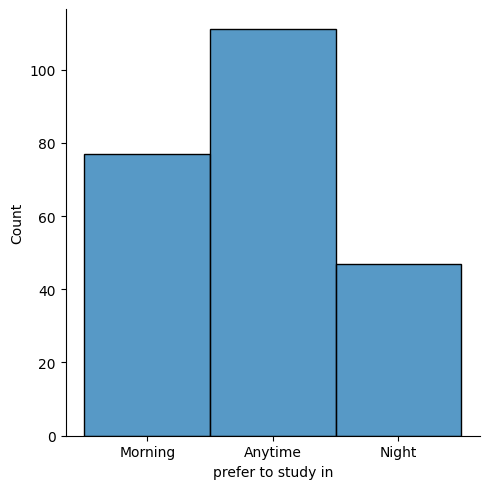

In [46]:
sns.displot(df['prefer to study in'])

In [40]:
## normality check

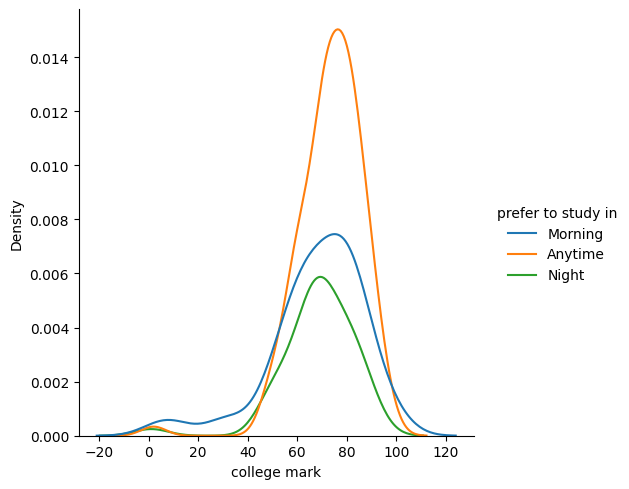

In [53]:
sns.displot(data = df, x = 'college mark', hue = 'prefer to study in', kind = 'kde')

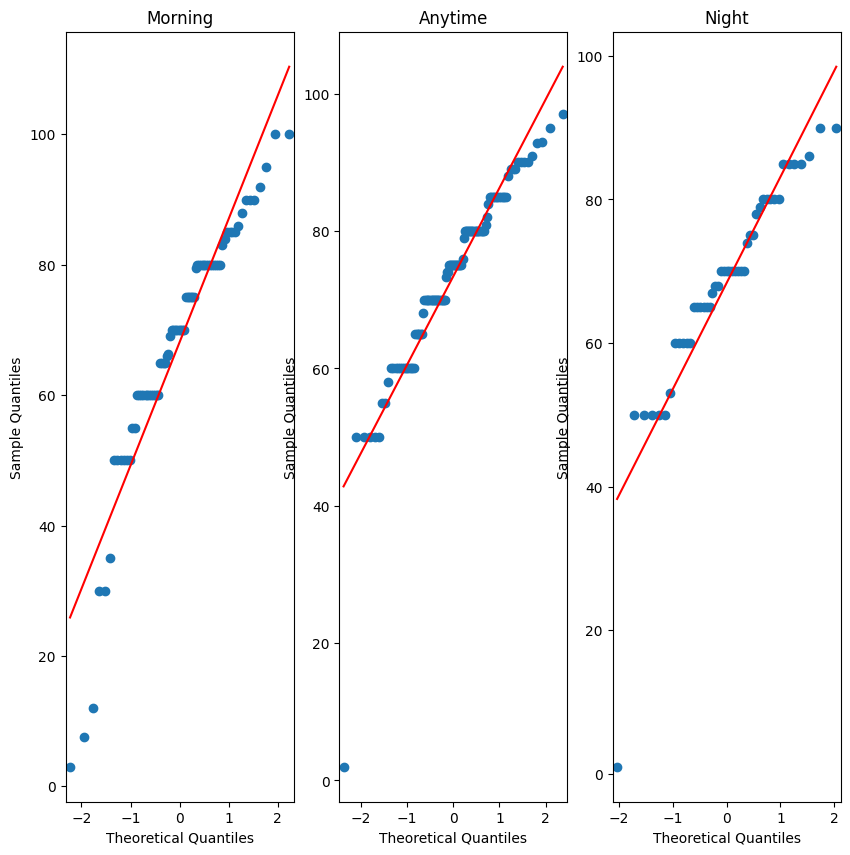

In [34]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize = (10,10))
sm.qqplot(df[df['prefer to study in'] == 'Morning']['college mark'], ax = axes[0],line = 's')
axes[0].set_title('Morning')

sm.qqplot(df[df['prefer to study in'] == 'Anytime']['college mark'], ax = axes[1],line = 's')
axes[1].set_title('Anytime')

sm.qqplot(df[df['prefer to study in'] == 'Night']['college mark'], ax = axes[2],line = 's')
axes[2].set_title('Night')

plt.show()

In [17]:
df['college mark'].describe()

count    235.000000
mean      70.660553
std       15.727446
min        1.000000
25%       60.000000
50%       70.000000
75%       80.000000
max      100.000000
Name: college mark, dtype: float64

<Axes: xlabel='prefer to study in', ylabel='college mark'>

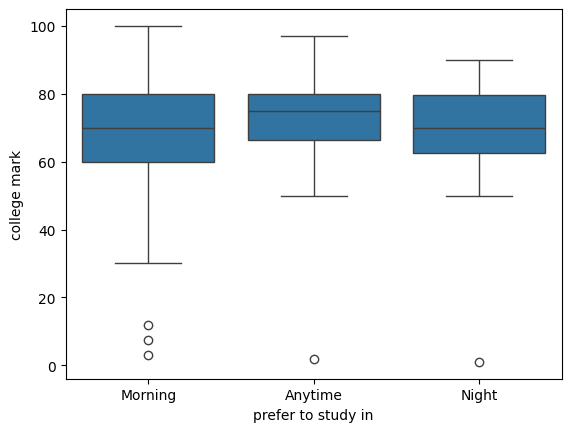

In [45]:
import seaborn as sns

sns.boxplot(data = df, x = 'prefer to study in', y = 'college mark')

In [46]:
df_college_mark_counts = (df['college mark'] < 20).sum()
df_college_mark_counts

5

In [5]:
lower_df = df[df['college mark'] < 20]
lower_df

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
6,Yes,Male,BCA,165.0,50.0,70.0,63.0,3.0,Reading books,1 - 2 Hour,Morning,15000,Yes,75%,1 - 1.30 hour,1 - 1.30 hour,Good,good,No
49,No,Male,B.com Accounting and Finance,155.0,55.0,73.0,72.0,1.0,Reading books,1 - 2 Hour,Night,15000,Yes,75%,1 - 30 Minute,30 - 60 minutes,Good,good,No
93,No,Male,BCA,175.0,65.0,76.0,70.0,7.5,Sports,1 - 2 Hour,Morning,15000,No,50%,1 - 1.30 hour,30 - 60 minutes,Good,good,No
148,No,Female,B.com Accounting and Finance,130.0,35.0,80.2,70.0,12.0,Reading books,More Than 4 hour,Morning,30000,No,50%,30 - 60 Minute,1 - 1.30 hour,Good,Bad,No
183,Yes,Male,B.com ISM,173.0,92.0,54.0,65.0,2.0,Cinema,0 - 30 minute,Anytime,23000,Yes,100%,More than 2 hour,1 - 1.30 hour,Good,good,No


In [2]:
## ps. 이상치 제거 여부 => not equal 0이고, 샘플 수가 적기 때문에 이상치 제거 안하고 분석 진행!

In [47]:
# normal
from scipy.stats import shapiro

print(shapiro(df[df['prefer to study in'] == 'Morning']['college mark']))
print(shapiro(df[df['prefer to study in'] == 'Anytime']['college mark']))
print(shapiro(df[df['prefer to study in'] == 'Night']['college mark']))

ShapiroResult(statistic=0.8990122079849243, pvalue=1.5592280760756694e-05)
ShapiroResult(statistic=0.8948537707328796, pvalue=2.629093387440662e-07)
ShapiroResult(statistic=0.8447308540344238, pvalue=1.88336125575006e-05)


In [ ]:
## A. shapiro test 결과, 세 가지 그룹에 대해 모두 귀무가설 기각, normal을 따르지 않는다고 판단.

In [48]:
## equal variance test
from scipy.stats import levene
levene(df[df['prefer to study in'] == 'Morning']['college mark'],
        df[df['prefer to study in'] == 'Anytime']['college mark'],
        df[df['prefer to study in'] == 'Night']['college mark'])

LeveneResult(statistic=3.705792012954079, pvalue=0.026047597758914846)

In [ ]:
## A. levene test 결과, p-value < 0.05로 귀무가설 기각, 즉 분산이 같지 않다고 판단.

In [51]:
## ANOVA test
from scipy.stats import kruskal
kruskal(df[df['prefer to study in'] == 'Morning']['college mark'],
        df[df['prefer to study in'] == 'Anytime']['college mark'],
        df[df['prefer to study in'] == 'Night']['college mark'])

KruskalResult(statistic=5.816953896031301, pvalue=0.05455876245308601)

In [1]:
## normal을 따르지 않고 분산이 같지 않다고 판단하여, kruskal test를 수행한 결과,
## p-value > 0.05로 귀무가설 채택
## 공부를 선호하는 시간(prefer to study in)에 따른 대학 성적(college mark)이 유의미한 차이가 없다고 결론을 냄.

In [13]:
## linear regression
